In [1]:
from gensim import corpora, models, similarities
f1 = open("1.txt",'r',encoding = 'utf-8')
cons = f1.readlines()
texts=[]
for con in cons:
    sen1 = list(con.strip().split(" "))
    texts.append(sen1)
#print(len(texts))

from gensim import corpora 
from gensim.models import LdaModel 
from gensim import models
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda = LdaModel(corpus=corpus, id2word=dictionary, random_state=1,
                          num_topics=5)  # random_state 等价于随机种子的random.seed()，使每次产生的主题一致

topic_list = lda.print_topics(5,10)
    #return lda, dictionary
    
print("期刊主题的单词分布为：\n")
for topic in topic_list:
    print(topic)

49


期刊主题的单词分布为：

(0, '0.012*"model" + 0.008*"cloud" + 0.008*"system" + 0.006*"proposed" + 0.006*"markov" + 0.006*"approach" + 0.006*"problem" + 0.006*"parameter" + 0.005*"set" + 0.005*"result"')
(1, '0.009*"data" + 0.008*"model" + 0.008*"image" + 0.006*"problem" + 0.006*"proposed" + 0.006*"system" + 0.006*"set" + 0.005*"paper" + 0.005*"new" + 0.005*"markov"')
(2, '0.009*"image" + 0.007*"aura" + 0.007*"fuzzy" + 0.006*"paper" + 0.006*"set" + 0.005*"proposed" + 0.005*"problem" + 0.005*"information" + 0.005*"descriptor" + 0.005*"approach"')
(3, '0.011*"image" + 0.010*"method" + 0.009*"proposed" + 0.009*"based" + 0.009*"algorithm" + 0.009*"fuzzy" + 0.007*"problem" + 0.007*"paper" + 0.006*"approach" + 0.006*"system"')
(4, '0.010*"image" + 0.008*"paper" + 0.008*"system" + 0.008*"approach" + 0.007*"information" + 0.007*"credibility" + 0.006*"result" + 0.006*"technique" + 0.006*"agent" + 0.005*"proposed"')


面对不同的数据，我需要做的是

一个Excel表格，里面有论文标题数据等信息，跑出来每篇文献的类别，以及主题强度。

In [6]:
import matplotlib 
import numpy as np 
import xlrd 
import pandas as pd ##################################读取文件################################### 
# create sample documents 
path="测试-50篇文献.xlsx" 
data=xlrd.open_workbook(path) 
sheet_1_by_index=data.sheet_by_index(0) 
title=sheet_1_by_index.col_values(1) 
n_of_rows=sheet_1_by_index.nrows 
doc_set=[] 
for i in range(1,n_of_rows):
    doc_set.append(title[i]) #把题目串一起。

['Phasic triplet markov chains', 'Accelerating filtering techniques for numeric CSPs', 'Interacting behavioral Petri nets analysis for distributed causal model-based diagnosis', 'Dempster-Shafer Fusion of Evidential Pairwise Markov Chains', 'Unified Representation of Sets of Heterogeneous Markov Transition Matrices', 'Qualitative reasoning based on fuzzy relative orders of magnitude', 'Noninteracting adaptive control of PMSM using interval type-2 fuzzy logic systems', 'On Matrix Norms, Stability and Stabilization of a Class of Discrete Takagi-Sugeno Fuzzy Systems', 'Fuzzy Adaptive State-Feedback Control Scheme of Uncertain Nonlinear Multivariable Systems', 'A stable model-based fuzzy predictive control based on fuzzy dynamic programming', 'Genetic algorithm for the design of a class of fuzzy controllers: An alternative approach', 'Metacognitive Octonion-Valued Neural Networks as They Relate to Time Series Analysis', 'Nonlinear topological component analysis: Application to age-invarian

In [3]:
def format_topics_sentences(ldamodel, corpus, texts): 
    sent_topics_df = pd.DataFrame() 
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True) 
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num) 
                topic_keywords = ", ".join([word for word, prop in wp]) 
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),round(prop_topic,4), topic_keywords]), ignore_index=True)
            else: 
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'] 
    contents = pd.Series(texts) 
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1) 
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(lda, corpus, doc_set) 
df_dominant_topic = df_topic_sents_keywords.reset_index() 
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib','Keywords', 'Text'] 
print(df_dominant_topic.head(10))
df_dominant_topic.to_csv("t1.csv",encoding="UTF-8",index=False ) 

# 找主题进行配对

1 先弄边再弄节点

2 我需要一个表格，里面仅包含主题词，如下图
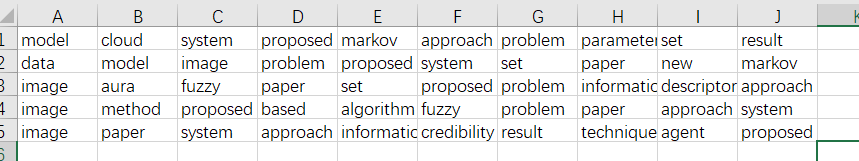


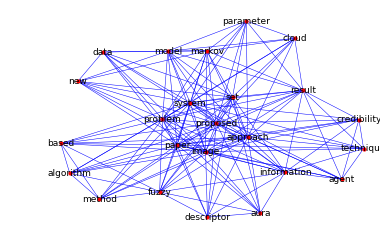

In [2]:
import xlrd
import itertools
data = xlrd.open_workbook("lda-res.xlsx")
sheet_1_by_index=data.sheet_by_index(0) 
n_of_rows=sheet_1_by_index.nrows 
f1 = open(r't1配对.txt','w',encoding = 'utf-8')
for i in range(0,n_of_rows):
    danci = sheet_1_by_index.row_values(i)
    cc = list(itertools.combinations(danci, 2))
    f1.write(str(cc))
f1.close()

# 生成 边数据edge
# 需要以下这样的格式
# edge=[['model', 'learning'], ['model', 'task']]
f2 = open(r't1配对.txt','r',encoding = 'utf-8')
con1 = f2.read().replace("), (","],[")
con2 = con1.replace(")][(","],[")
con3 = con2.replace("[(","[") #开头
con4 = con3.replace(")]","]") #结尾
a=eval(con4)
edge=list(a)
f2.close()

import xlrd
import itertools
data = xlrd.open_workbook("lda-res.xlsx")
sheet_1_by_index=data.sheet_by_index(0) 
n_of_rows=sheet_1_by_index.nrows 
list_set=[] 
for i in range(0,n_of_rows):
    danci = sheet_1_by_index.row_values(i)
    list_set.append(danci)
new = sum(list_set,[])
node = list(set(new)) # 得到去重之后的全部单词，格式符合node节点！！！


#####################################################
# 生成外部文件格式
import networkx as nx

G=nx.Graph()
G.add_nodes_from(node)
G.add_edges_from(edge)
nx.write_gexf(G,'t1期刊.gexf')

#####################################################
import matplotlib.pyplot as plt
network_file ='t1期刊.gexf'
G = nx.read_gexf(path=network_file)
#print(G.nodes()) #  测试
#print(G.edges()) #  测试 
pos = nx.spring_layout(G)  
# nx.draw_networkx_nodes(G, pos, node_size=9, alpha=0.5) 
# #nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1.5, alpha=0.45, edge_color='b') 
# #nx.draw_networkx_edges(G, pos, edgelist=esmall, width=0.25, alpha=0.9, edge_color='b',style='dashed') 
# nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif', edge_color='k') 
# plt.axis('off') 
#      #  显示网络图 
# plt.show()
nx.draw_networkx_nodes(G, pos, node_size=10)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=1, edge_color='b')
nx.draw_networkx_labels(G, pos, font_size=9, font_color='k')
plt.axis('off')
plt.show()

In [9]:
betweenness_centrality = nx.betweenness_centrality(G, k=10) 
betweenness_centrality

{'agent': 0.0,
 'algorithm': 0.0,
 'approach': 0.07523997741389045,
 'aura': 0.0,
 'based': 0.0,
 'cloud': 0.0,
 'credibility': 0.0,
 'data': 0.0,
 'descriptor': 0.0,
 'fuzzy': 0.007933370976849237,
 'image': 0.05033879164313946,
 'information': 0.011123658949745903,
 'markov': 0.006719367588932805,
 'method': 0.0,
 'model': 0.006719367588932805,
 'new': 0.0,
 'paper': 0.05033879164313946,
 'parameter': 0.0,
 'problem': 0.05815358554488988,
 'proposed': 0.08891586674195369,
 'result': 0.02210615471485036,
 'set': 0.03468661773009599,
 'system': 0.06677583286278937,
 'technique': 0.0}

In [10]:
betweenness_centrality = nx.betweenness_centrality(G, k=20) 
betweenness_centrality

{'agent': 0.0,
 'algorithm': 0.0,
 'approach': 0.0576086956521739,
 'aura': 0.0,
 'based': 0.0,
 'cloud': 0.0,
 'credibility': 0.0,
 'data': 0.0,
 'descriptor': 0.0,
 'fuzzy': 0.008512140033879163,
 'image': 0.06077075098814229,
 'information': 0.012230378317334837,
 'markov': 0.005928853754940711,
 'method': 0.0,
 'model': 0.005928853754940711,
 'new': 0.0,
 'paper': 0.06077075098814229,
 'parameter': 0.0,
 'problem': 0.045321852060982486,
 'proposed': 0.08057312252964427,
 'result': 0.016812535290796158,
 'set': 0.021928289102202146,
 'system': 0.06472049689440992,
 'technique': 0.0}

In [5]:
import xlrd
import itertools
data = xlrd.open_workbook("lda-res.xlsx")
sheet_1_by_index=data.sheet_by_index(0) 
n_of_rows=sheet_1_by_index.nrows 
f1 = open(r't1配对.txt','w',encoding = 'utf-8')
for i in range(0,n_of_rows):
    danci = sheet_1_by_index.row_values(i)
    cc = list(itertools.combinations(danci, 2))
    f1.write(str(cc))
f1.close()

# 生成 边数据edge
# 需要以下这样的格式
# edge=[['model', 'learning'], ['model', 'task']]
f2 = open(r't1配对.txt','r',encoding = 'utf-8')
con1 = f2.read().replace("), (","],[")
con2 = con1.replace(")][(","],[")
con3 = con2.replace("[(","[") #开头
con4 = con3.replace(")]","]") #结尾
a=eval(con4)
edge=list(a)
f2.close()

import xlrd
import itertools
data = xlrd.open_workbook("lda-res.xlsx")
sheet_1_by_index=data.sheet_by_index(0) 
n_of_rows=sheet_1_by_index.nrows 
list_set=[] 
for i in range(0,n_of_rows):
    danci = sheet_1_by_index.row_values(i)
    list_set.append(danci)
new = sum(list_set,[])
node = list(set(new))   # 得到去重之后的全部单词，格式符合node节点！！！
node = node*2

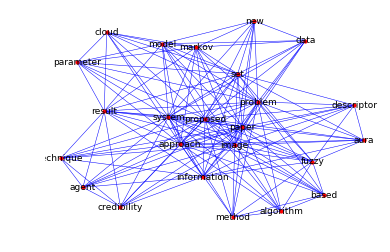

In [6]:
#####################################################
# 生成外部文件格式
import networkx as nx

G=nx.Graph()
G.add_nodes_from(node)
G.add_edges_from(edge)
nx.write_gexf(G,'t2期刊.gexf')

#####################################################
import matplotlib.pyplot as plt
network_file ='t2期刊.gexf'
G = nx.read_gexf(path=network_file)
#print(G.nodes()) #  测试
#print(G.edges()) #  测试 
pos = nx.spring_layout(G)  
# nx.draw_networkx_nodes(G, pos, node_size=9, alpha=0.5) 
# #nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1.5, alpha=0.45, edge_color='b') 
# #nx.draw_networkx_edges(G, pos, edgelist=esmall, width=0.25, alpha=0.9, edge_color='b',style='dashed') 
# nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif', edge_color='k') 
# plt.axis('off') 
#      #  显示网络图 
# plt.show()
nx.draw_networkx_nodes(G, pos, node_size=10)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=1, edge_color='b')
nx.draw_networkx_labels(G, pos, font_size=9, font_color='k')
plt.axis('off')
plt.show()

In [7]:
betweenness_centrality = nx.betweenness_centrality(G, k=20) 
betweenness_centrality

{'agent': 0.0,
 'algorithm': 0.0,
 'approach': 0.06710333145115753,
 'aura': 0.0,
 'based': 0.0,
 'cloud': 0.0,
 'credibility': 0.0,
 'data': 0.0,
 'descriptor': 0.0,
 'fuzzy': 0.007509881422924901,
 'image': 0.06465273856578203,
 'information': 0.014246188594014678,
 'markov': 0.006719367588932805,
 'method': 0.0,
 'model': 0.006719367588932805,
 'new': 0.0,
 'paper': 0.06465273856578203,
 'parameter': 0.0,
 'problem': 0.05365894974590626,
 'proposed': 0.09085827216261996,
 'result': 0.01945228684359119,
 'set': 0.03073404856013552,
 'system': 0.0669734613212874,
 'technique': 0.0}